In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns   
import numpy as np
plt.style.use('ggplot') 

In [3]:
# Import sale data

sale = pd.read_csv('data/sales_data.csv', parse_dates =['date'])

Check dataset


In [4]:
sale.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [5]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [6]:
sale.describe()

,date,quantity,unit_price,total
count,1000,1000.000000,1000.000000,1000.000000
mean,2021-07-15 00:05:45.600000,9.395000,30.322040,289.113000
min,2021-06-01 00:00:00,1.000000,10.030000,10.350000
25%,2021-06-24 00:00:00,4.000000,21.085000,93.687500
50%,2021-07-14 00:00:00,6.500000,28.570000,178.360000
75%,2021-08-06 00:00:00,10.000000,37.917500,321.690000
max,2021-08-28 00:00:00,40.000000,66.620000,2546.330000
std,NaN,9.659207,12.256488,345.227596


In [7]:
#checking null values
sale.isnull().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

EXTRACT DATE AND MONTH FROM DATE

In [10]:
sale['week'] = sale['date'].dt.day_name()
sale['month'] = sale['date'].dt.month_name()


In [13]:
sale.head()



,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,week,month
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,Tuesday,June
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,Tuesday,June
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,Tuesday,June
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,Tuesday,June
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,Tuesday,June


DEFINE FUNCTION FOR PLOTTING BAR PLOT

In [14]:
def plot_bar(data,x,y,title,xlabel,ylabel):
    plt.figure(figsize=(15,9))
    splot=sns.barplot(data=data,x=x,y=y,ci=0)

    for p in splot.patches:
        splot.annotate(round(p.get_height(),2), #text write on top
                       (p.get_x() + p.get_width()/2, p.get_height()), #location of text
                       ha='center', va='center',  #alignment of the text
                       xytext=(0,10), #distance of text from top of the patch
                       textcoords = 'offset points') #do not change and remove it
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

DEFINE FUNCTION FOR HEATMAP

In [45]:
def plot_heatmap(data,xlabel,ylabel,title=" "):
    plt.figure(figsize=(15,10))
    sns.heatmap(data=data,cmap="binary", annot=True, fmt='g')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

## The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

Correlation

/Users/lap01663/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


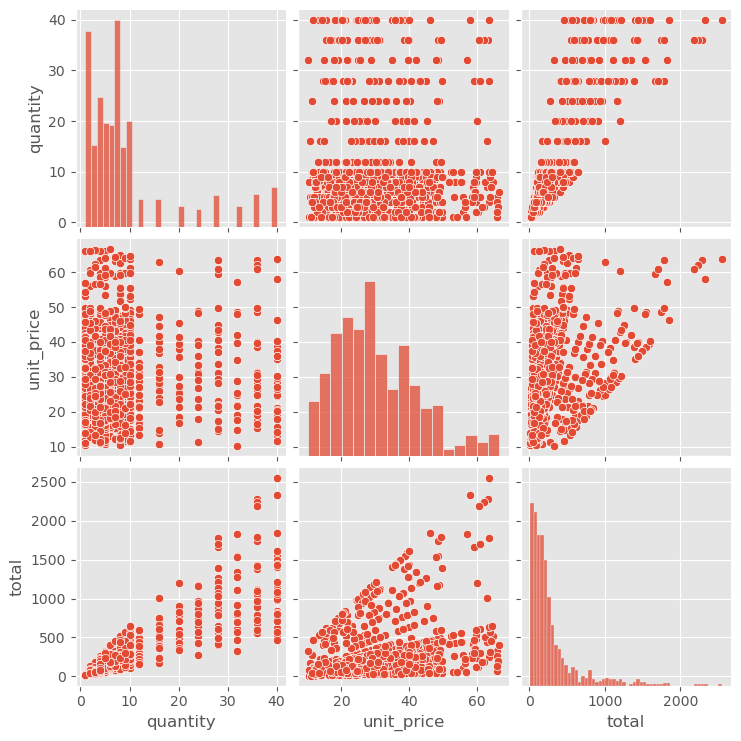

In [16]:
#Getting numeric columns in list and checking correlation
columns = list()
for col in sale:
    if (sale[col].dtype!="object" and sale[col].dtype!="datetime64[ns]"):
        columns.append(col)

sns.pairplot(data=sale, x_vars=columns)
plt.show()

Observation:

"Total" and "quantity" are in high correlation
"Total" and "Unit Price" are in high correlation

1. Total sale for each payment method

In [18]:
total_sale_by_payment= sale.groupby("payment")['total'].sum().reset_index().sort_values('total')
total_sale_by_payment

,payment,total
0,Cash,19199.10
1,Credit card,110271.57
2,Transfer,159642.33


/var/folders/1z/kfg082hx0y16vm3w8tyj1_h00000gn/T/ipykernel_2699/2113062611.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  splot=sns.barplot(data=data,x=x,y=y,ci=0)


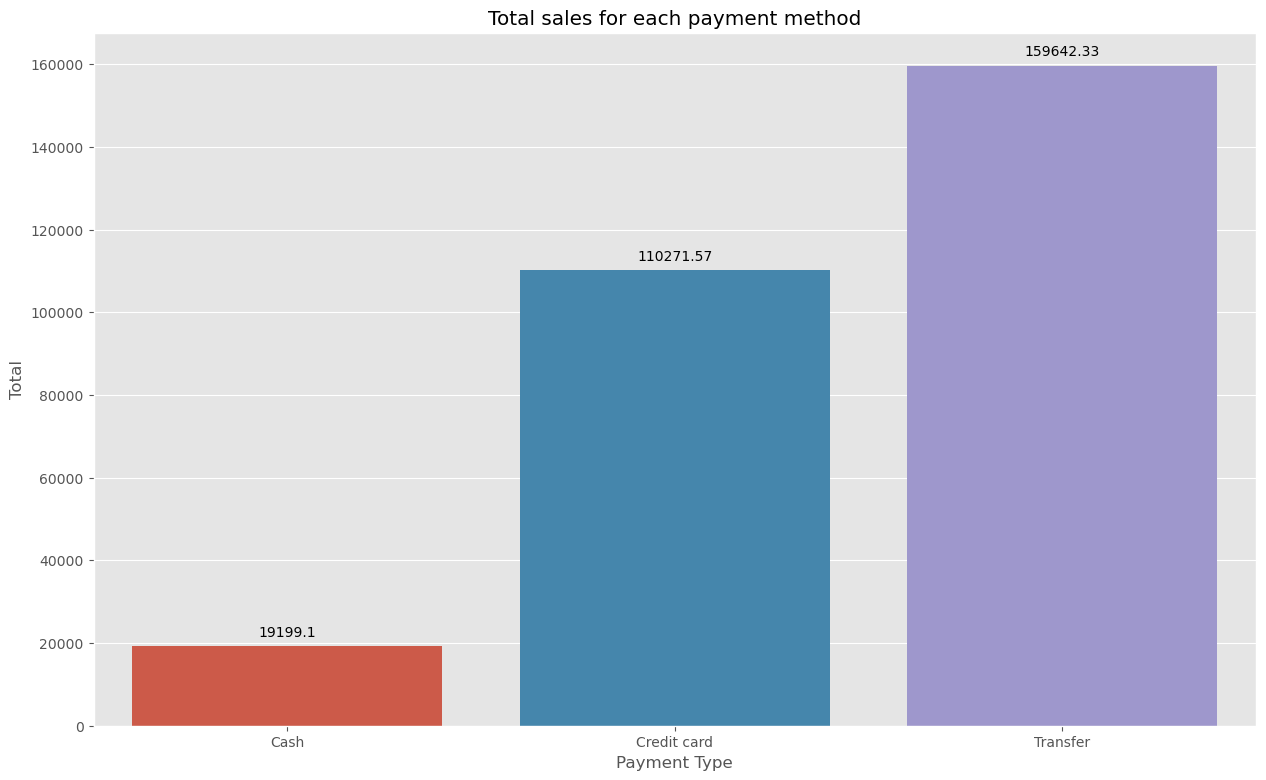

In [19]:
plot_bar(total_sale_by_payment,"payment","total","Total sales for each payment method","Payment Type","Total")


Observation:
Transfer is the most popular method for payment

2. Total sale by warehouse

In [20]:
total_sale_by_warehoue= sale.groupby("warehouse")['total'].sum().reset_index().sort_values('total')
total_sale_by_warehoue

,warehouse,total
2,West,46926.49
1,North,100203.63
0,Central,141982.88


/var/folders/1z/kfg082hx0y16vm3w8tyj1_h00000gn/T/ipykernel_2699/2113062611.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  splot=sns.barplot(data=data,x=x,y=y,ci=0)


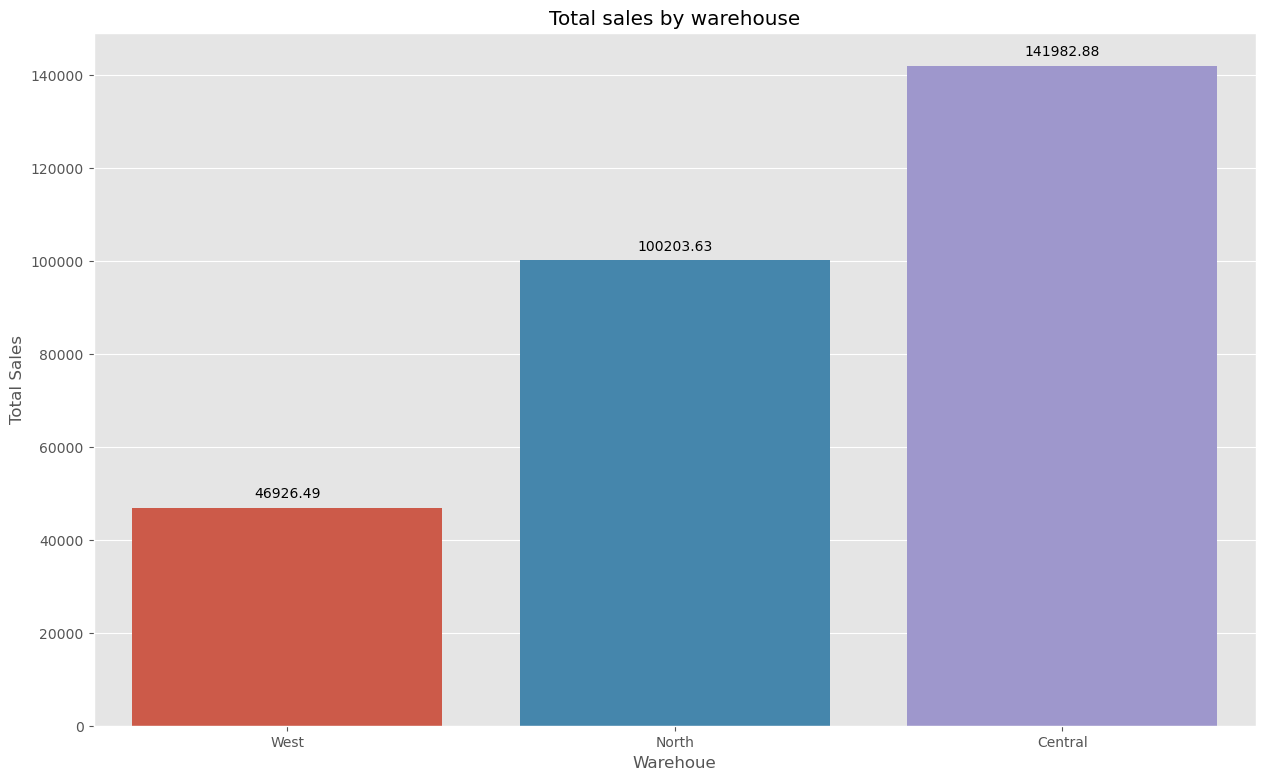

In [22]:
plot_bar(total_sale_by_warehoue,'warehouse','total',"Total sales by warehouse","Warehoue","Total Sales")

Observation:
The warehouse with the highest sale is "Central

3. Average unit price for production line

In [24]:
avg_unit_price_per_production_line = sale.groupby("product_line")['unit_price'].mean().reset_index().sort_values('unit_price')
avg_unit_price_per_production_line

,product_line,unit_price
0,Breaking system,17.740522
4,Miscellaneous,22.810738
1,Electrical system,25.585130
5,Suspension & traction,33.969868
3,Frame & body,42.832229
2,Engine,60.091803


/var/folders/1z/kfg082hx0y16vm3w8tyj1_h00000gn/T/ipykernel_2699/2113062611.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  splot=sns.barplot(data=data,x=x,y=y,ci=0)


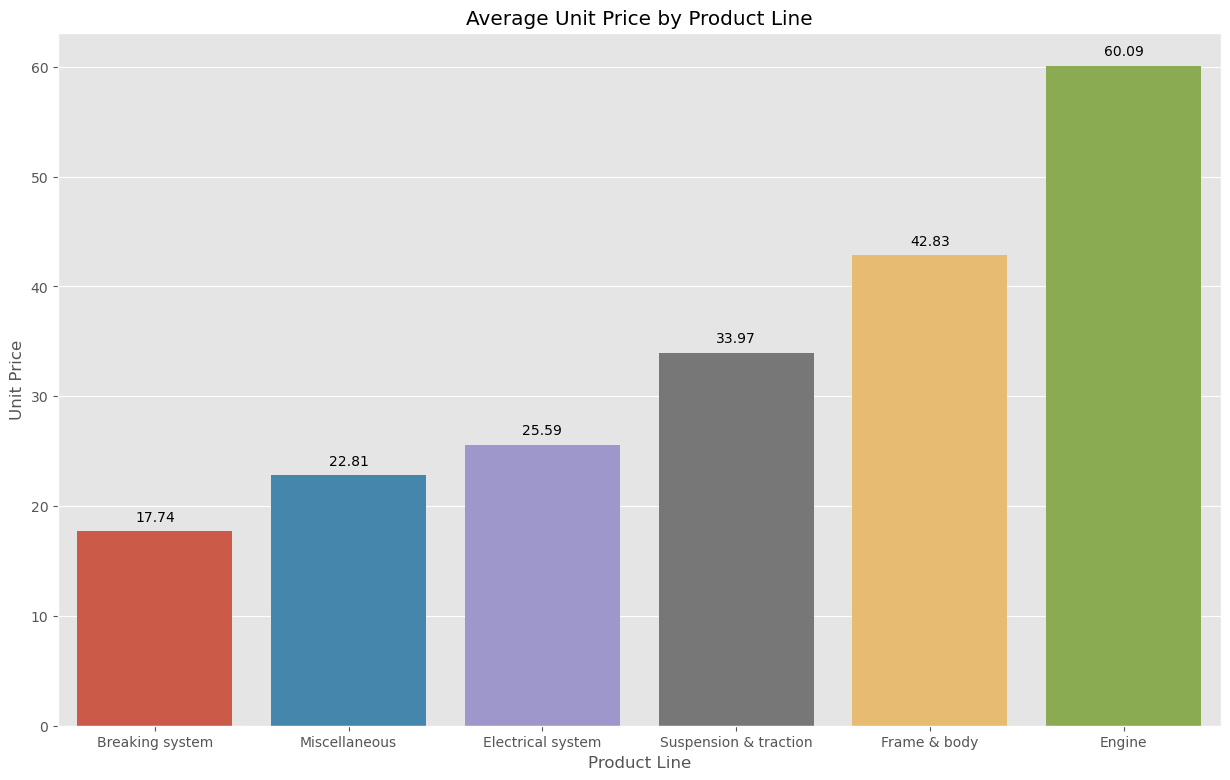

In [26]:
plot_bar(avg_unit_price_per_production_line,"product_line","unit_price","Average Unit Price by Product Line","Product Line","Unit Price")


Observation:
"Engine" and "Frame & body" are the product lunes that had highest avg price

Total sales by product line

In [29]:
total_sale_by_product_line = sale.groupby("product_line")["total"].sum().reset_index().sort_values("total")
total_sale_by_product_line

,product_line,total
4,Miscellaneous,27165.82
2,Engine,37945.38
0,Breaking system,38350.15
1,Electrical system,43612.71
3,Frame & body,69024.73
5,Suspension & traction,73014.21


/var/folders/1z/kfg082hx0y16vm3w8tyj1_h00000gn/T/ipykernel_2699/2113062611.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  splot=sns.barplot(data=data,x=x,y=y,ci=0)


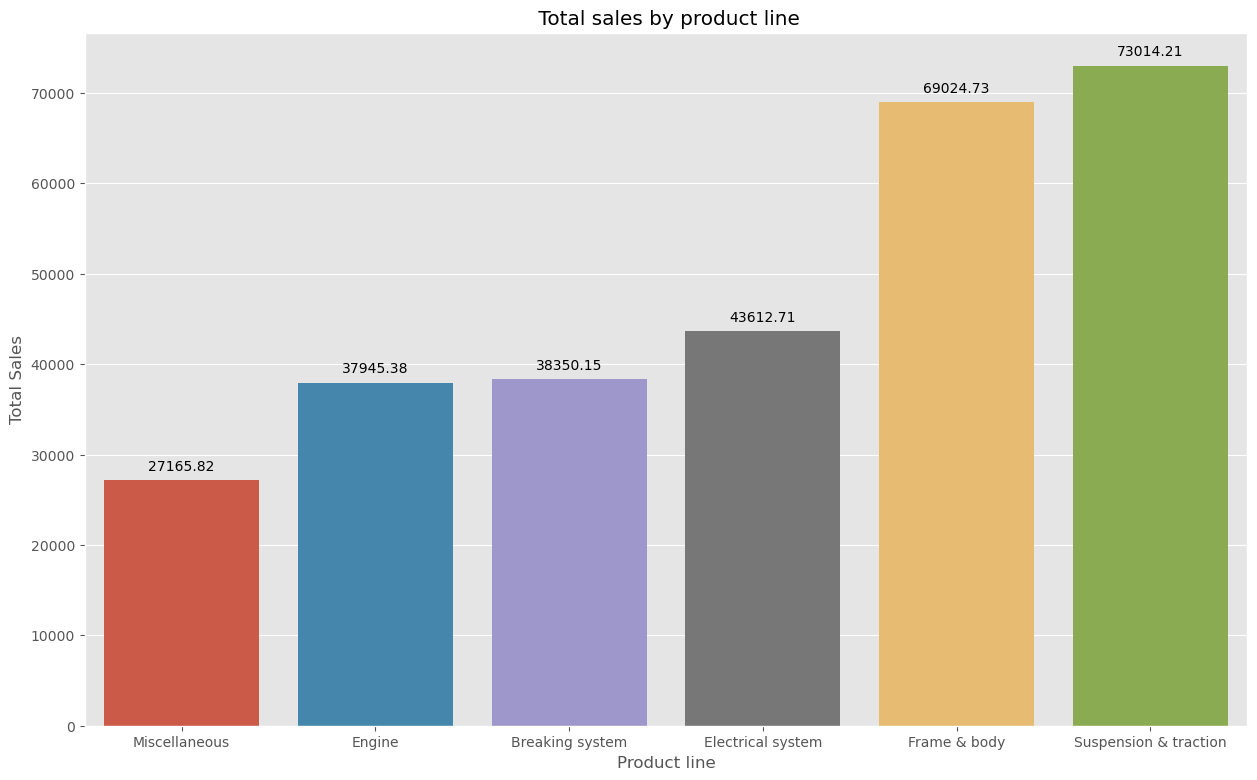

In [30]:
plot_bar(total_sale_by_product_line,"product_line","total"," Total sales by product line","Product line","Total Sales")


Observation: S&T and F&B were top 2 in sale by production line 

3. Total sales by client type

In [27]:
total_sale_by_client = sale.groupby("client_type")["total"].sum().reset_index().sort_values("total")
total_sale_by_client

,client_type,total
0,Retail,129470.67
1,Wholesale,159642.33


/var/folders/1z/kfg082hx0y16vm3w8tyj1_h00000gn/T/ipykernel_2699/2113062611.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  splot=sns.barplot(data=data,x=x,y=y,ci=0)


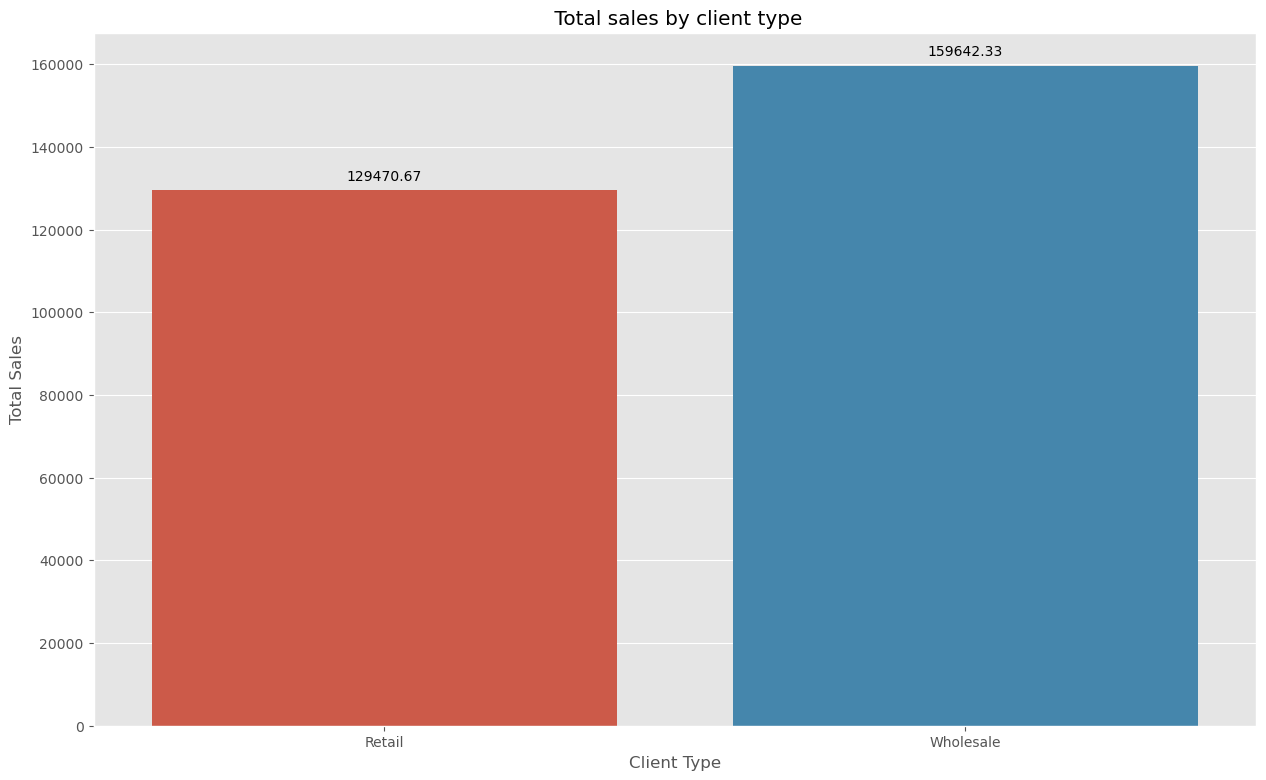

In [28]:
plot_bar(total_sale_by_client,"client_type","total"," Total sales by client type","Client Type","Total Sales")


Observation: Wholesale had higher purchase value than Retail

##Average sale by client

In [31]:
avg_sale_by_client = sale.groupby("client_type")["total"].mean().reset_index().sort_values("total")
avg_sale_by_client

,client_type,total
0,Retail,167.058929
1,Wholesale,709.521467


/var/folders/1z/kfg082hx0y16vm3w8tyj1_h00000gn/T/ipykernel_2699/2113062611.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  splot=sns.barplot(data=data,x=x,y=y,ci=0)


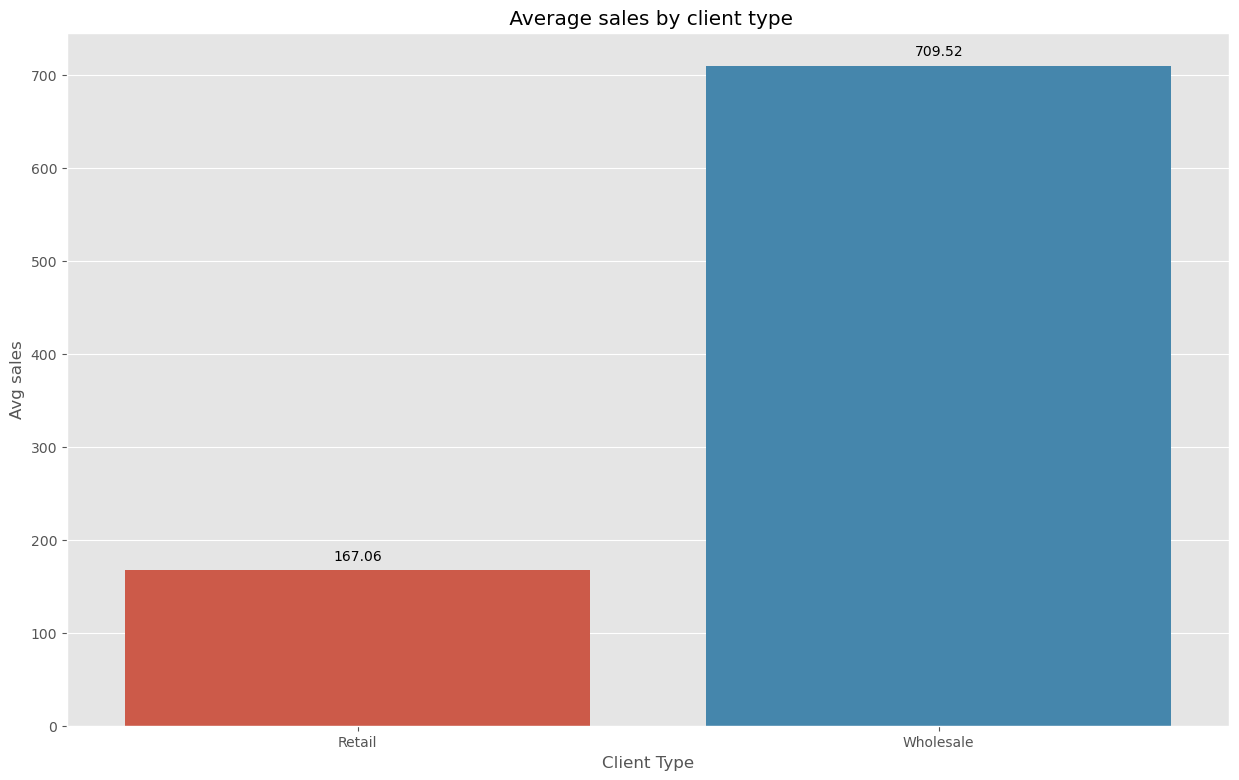

In [32]:
plot_bar(avg_sale_by_client,"client_type","total"," Average sales by client type","Client Type","Avg sales")


Observation: Avg purchase of whole sale outwweighted that of Retail

4. Sales by week

Average sales by week

In [34]:
Avg_Week_day_total=(sale.groupby(["week"])[["total"]].mean().reset_index().sort_values('total'))
Avg_Week_day_total

,week,total
4,Thursday,255.901667
6,Wednesday,271.681608
1,Monday,272.450080
2,Saturday,275.092378
0,Friday,290.009065
3,Sunday,309.412406
5,Tuesday,343.756835


/var/folders/1z/kfg082hx0y16vm3w8tyj1_h00000gn/T/ipykernel_2699/2113062611.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  splot=sns.barplot(data=data,x=x,y=y,ci=0)


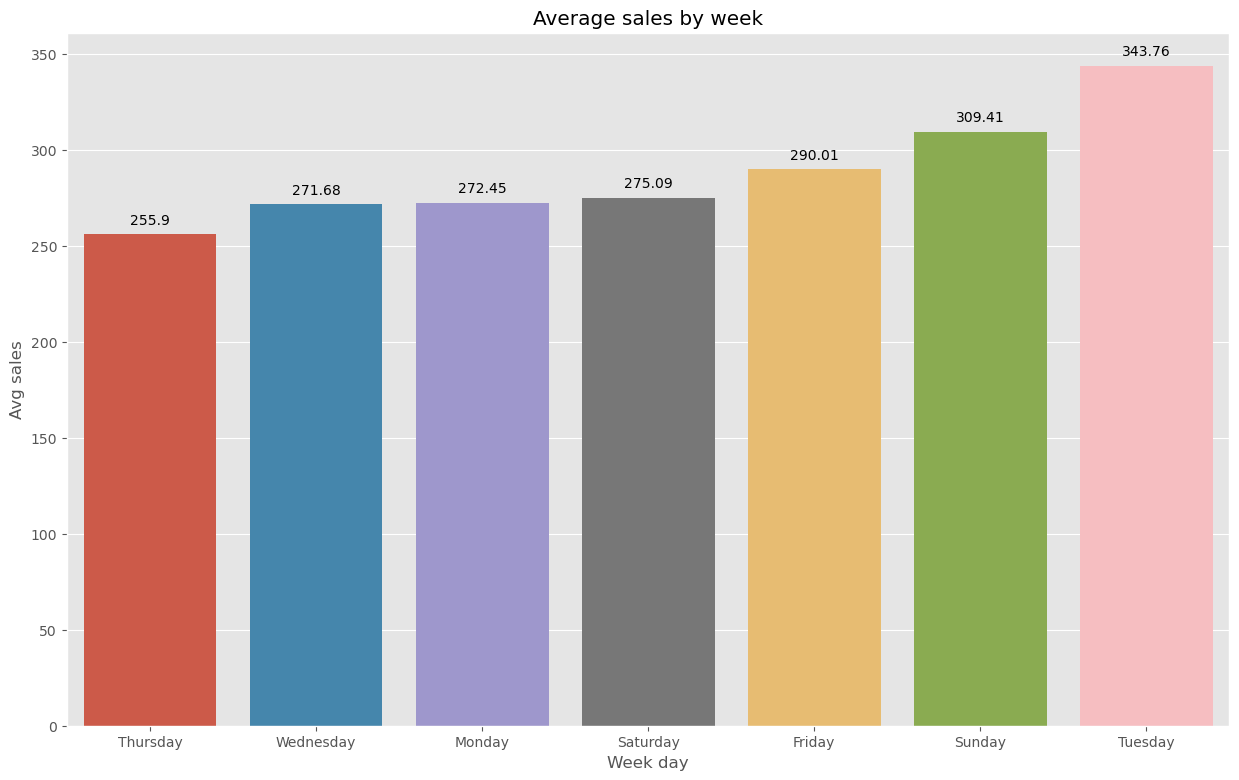

In [36]:
plot_bar(Avg_Week_day_total,"week","total","Average sales by week","Week day","Avg sales")

Observation: Days having the highest sales: Tue, Sun
             Days having the lowest sale:  Thu, Wed

5. Sales by Month

In [38]:
total_sales_by_month = sale.groupby("month")['total'].sum().reset_index().sort_values("total")
total_sales_by_month

,month,total
1,July,93547.91
2,June,95320.03
0,August,100245.06


/var/folders/1z/kfg082hx0y16vm3w8tyj1_h00000gn/T/ipykernel_2699/2113062611.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  splot=sns.barplot(data=data,x=x,y=y,ci=0)


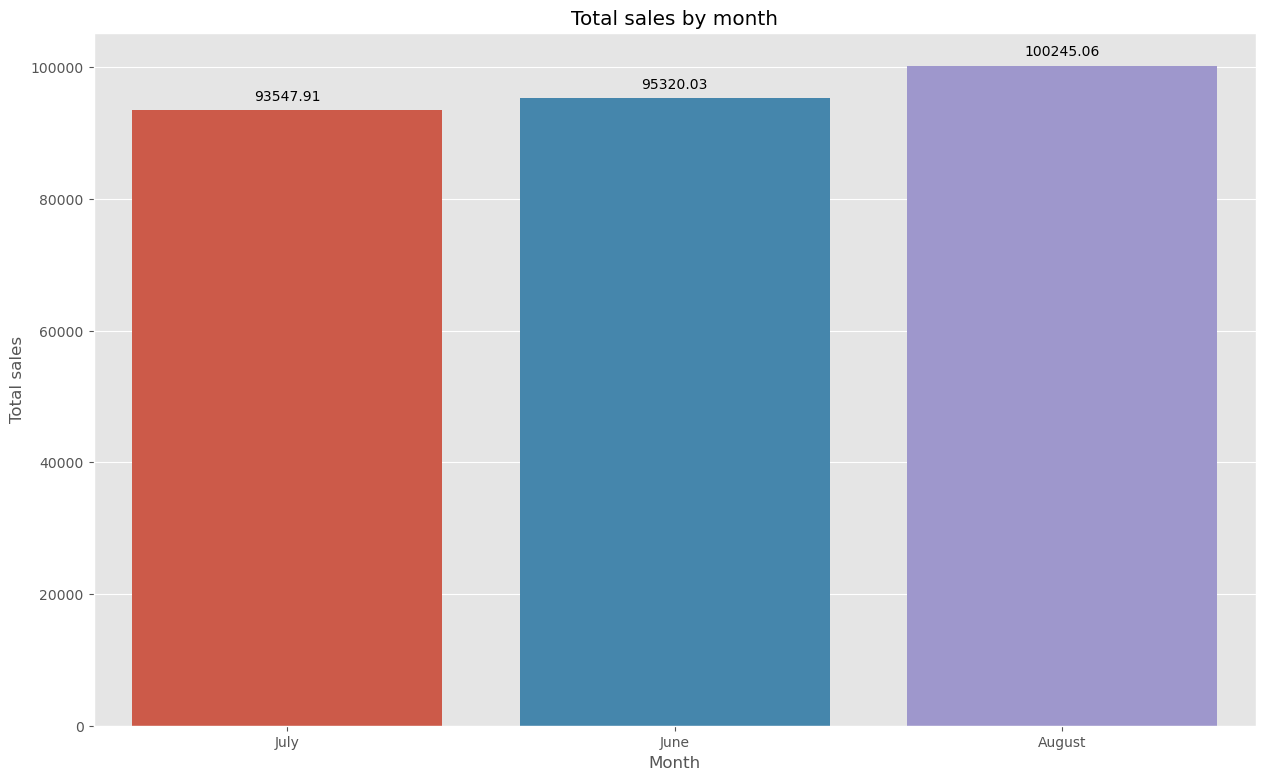

In [39]:
plot_bar(total_sales_by_month,"month","total","Total sales by month","Month","Total sales")

Observation: "August" had the highest sales of three month

6. Avg Total Value with Client type and Warehoue

In [47]:
product_line_month_values=np.round(sale.pivot_table(columns=["product_line"],index=["month"], values="total", aggfunc=np.mean),1)
product_line_month_values

product_line,Breaking system,Electrical system,Engine,Frame & body,Miscellaneous,Suspension & traction
month,,,,,,
August,163.2,234.3,883.3,546.3,226.7,296.4
July,179.9,230.3,470.2,355.2,223.7,326.6
June,155.0,210.7,557.2,371.3,218.4,338.8


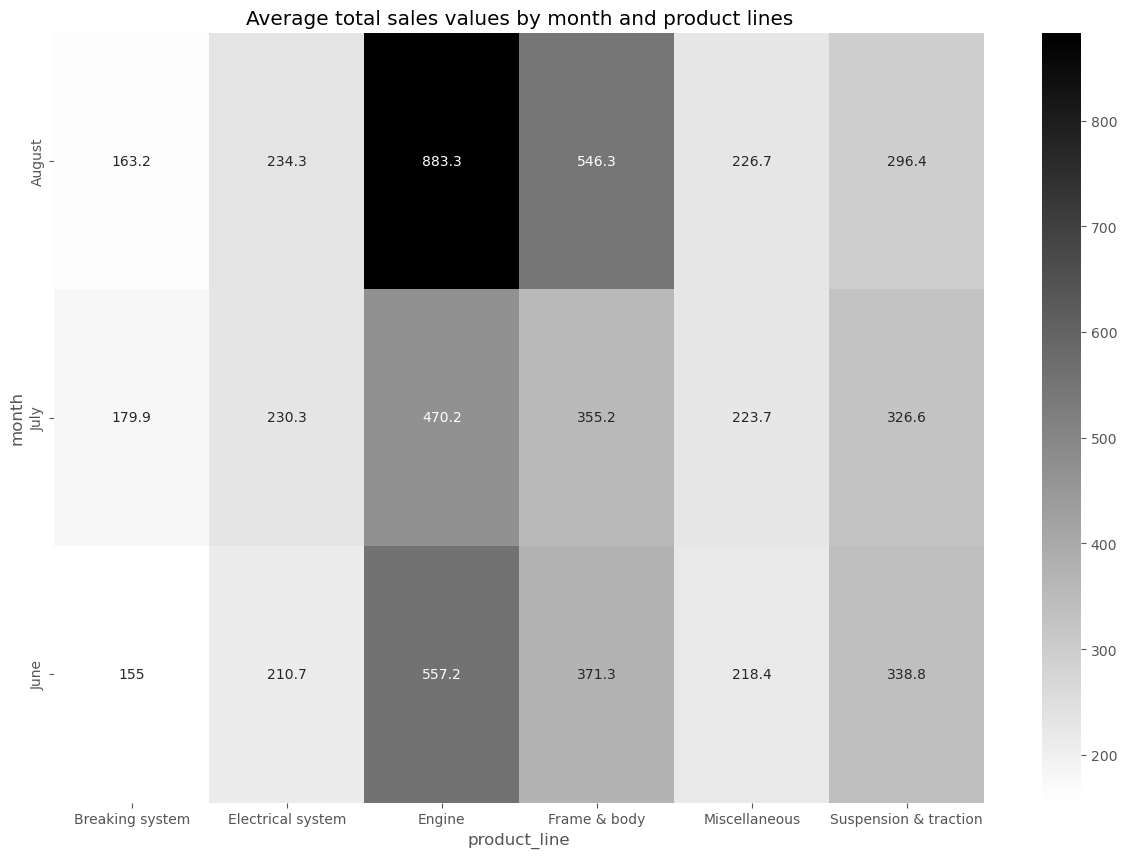

In [48]:
plot_heatmap(product_line_month_values,"product_line","month","Average total sales values by month and product lines")

Average Quantity with Month and Product line

In [49]:
product_line_month_qty=np.round(sale.pivot_table(columns=["product_line"],index=["month"], values="quantity", aggfunc=np.mean),1)
product_line_month_qty

product_line,Breaking system,Electrical system,Engine,Frame & body,Miscellaneous,Suspension & traction
month,,,,,,
August,9.4,9.2,14.7,12.7,9.9,8.8
July,9.4,9.0,7.9,8.4,9.7,9.5
June,8.9,8.0,9.0,8.7,9.4,9.9


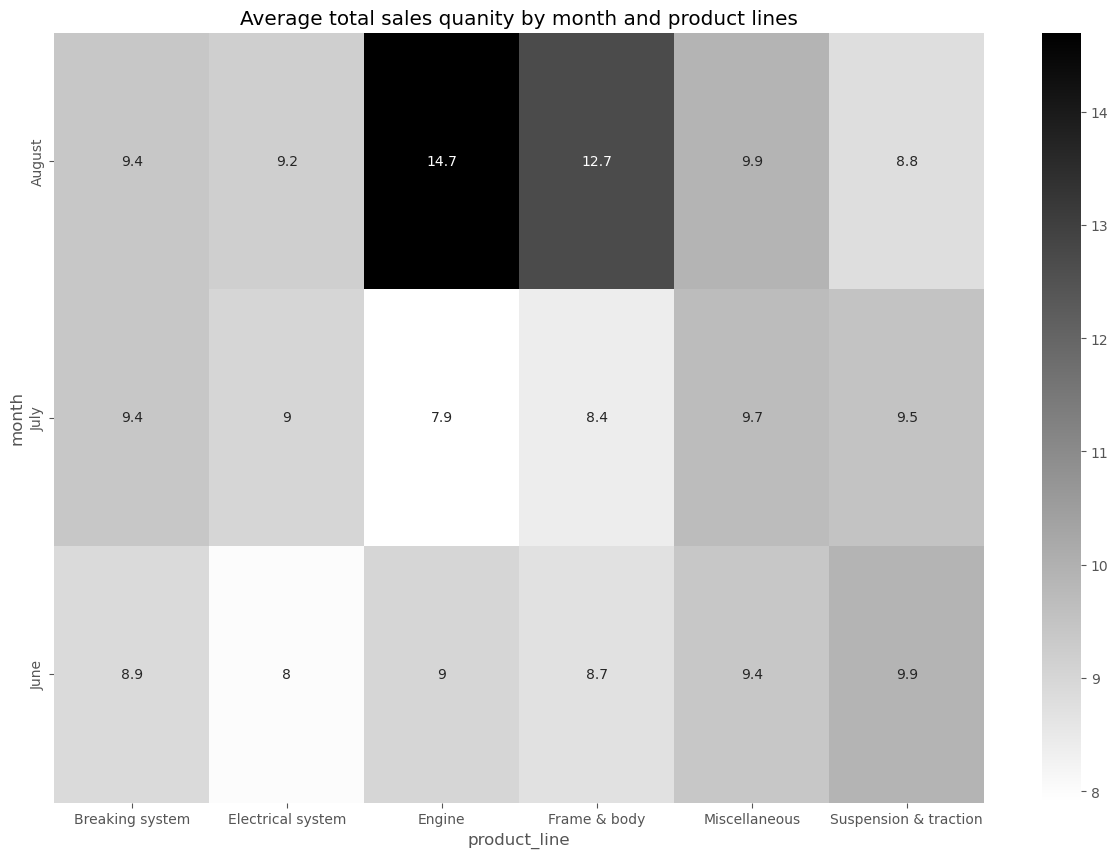

In [50]:
plot_heatmap(product_line_month_qty,"product_line","month","Average total sales quanity by month and product lines")

Observation:
August had the biggest average Engine sales and the same product line in Total Sales Values

# Summary

**Based on the 3 months data**
- **Highest** Total Sales value is coming from Payment Type **Transfer** and **North** warehouse is major contriutor to it.
- **West** warehoust is consistently reporting the **Lowest** average **Total Sales value** through out 3 months.
- **Highest** average Total value is coming in the month of **August** with **Engine** product line having mximum contributor to it.
- **Suspension and Traction** is having highest **Total Purchase value**.
- **Central** warehouse is brining in the **Highest** Total value